# **Project Name**    - Iris Flower Classification



# **Problem Statement**


The iris flower, scientifically known as Iris, is a distinctive genus of flowering plants. Within this genus, there are three primary species: Iris setosa, Iris versicolor, and Iris virginica. These species exhibit variations in their physical characteristics, particularly in the measurements of their sepal length, sepal width, petal length, and petal width.

## ***1. Dataset Overview***

In [3]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd
import xgboost as xgb
# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Library used for data preprocessing
from sklearn.preprocessing import LabelEncoder

# Import model selection libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Library used for ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
# Load Dataset
df = pd.read_csv("../Rutuja/Downloads/iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
# Dataset Rows & Columns count
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  150
Number of columns are:  5


In [9]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 3


#### Missing Values

In [15]:
# Missing Values/Null Values Count
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## ***2. Understanding The Variables***

In [18]:
# Dataset Columns
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [19]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.84,3.05,3.76,1.20,NaN
std,0.83,0.43,1.76,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.35,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


### Check Unique Values for each variable.

In [23]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in sepal_length is 35
No. of unique values in sepal_width is 23
No. of unique values in petal_length is 43
No. of unique values in petal_width is 22
No. of unique values in species is 3


## ***3. Data Vizualization***

#### Chart - 1 : Distribution of Numerical Variables

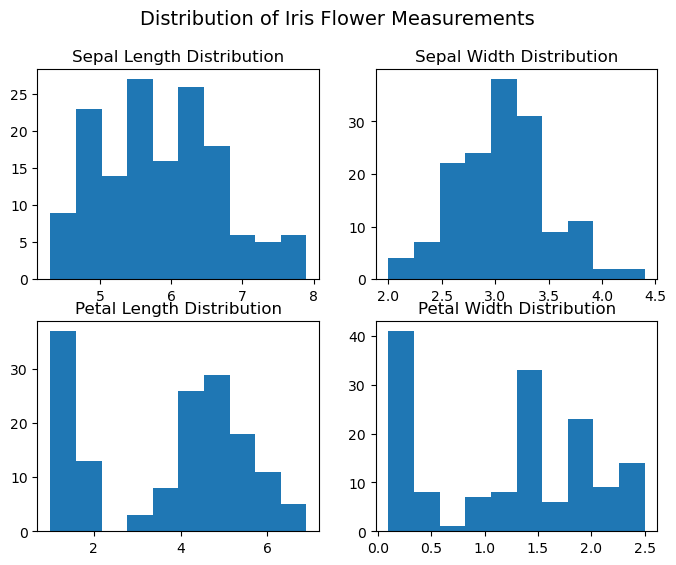

In [27]:
# Chart - 1 Histogram visualization code for distribution of numerical variables
# Create a figure with subplots
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

# Create a 2x2 grid of subplots
plt.subplot(2, 2, 1)  # Subplot 1 
plt.hist(df['sepal_length'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 
plt.hist(df['sepal_width'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # Subplot 3
plt.hist(df['petal_length'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 
plt.hist(df['petal_width'])
plt.title('Petal Width Distribution')

plt.show()

#### Chart - 2 : Correlation Heatmap

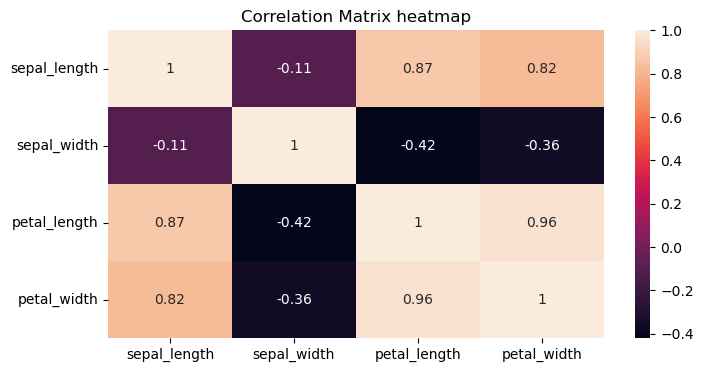

In [29]:
# Correlation Heatmap Visualization Code
corr_matrix = corr_matrix = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()

# Plot Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True)

# Setting Labels
plt.title('Correlation Matrix heatmap')

# Display Chart
plt.show()

## ***5. Feature Engineering & Data Pre-processing***

### 1. Categorical Encoding

In [32]:
# Encode the categorical columns
# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'Species' column to convert the species nameas to numerical labels
df['Species'] = le.fit_transform(df['species'])

# Check the unique values in the 'Species' column after encoding
unique_species = df['Species'].unique()

# Display the unique encoded values
print("Encoded Species Values:")
print(unique_species) # 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2

Encoded Species Values:
[0 1 2]


### 2. Data Scaling

In [34]:
# Defining the X and y
x = df.drop(columns=['species'], axis=1)
y = df['species']


### 3. Data Splitting

In [36]:
# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)

In [38]:
# Checking the train distribution of dependent variable
y_train.value_counts()

species
setosa        44
versicolor    39
virginica     37
Name: count, dtype: int64

## ***6. ML Model Implementation***

### ML Model - 1 : Logistic regression

In [41]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)

LogisticRegression()

Accuracy of the Logistic Regression model: 1.0


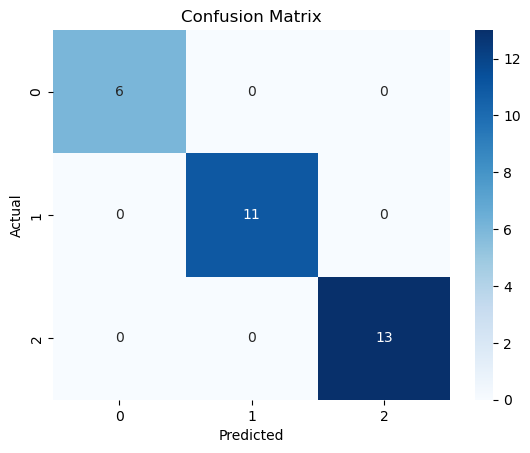

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [42]:
y_pred = model1.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Logistic Regression model:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


### ML Model - 2 : Decision Tree

In [45]:
# ML Model - 2 Implementation
model2 = DecisionTreeClassifier(random_state=20)
model2.fit(x_train, y_train)

DecisionTreeClassifier(random_state=20)

Accuracy of  Decision Tree Classifier : 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



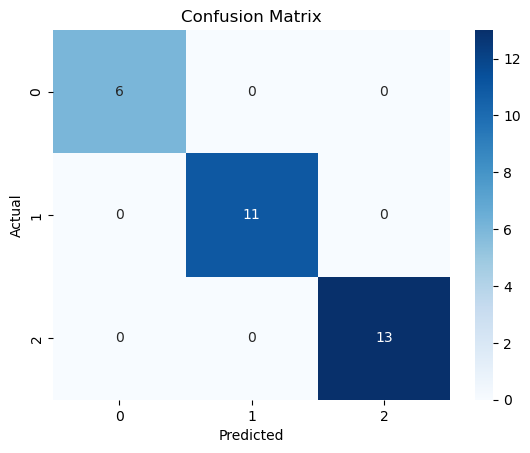

In [46]:
y_pred = model2.predict(x_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of  Decision Tree Classifier :", accuracy)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### ML Model - 3 : Random Forest

In [49]:
# ML Model - 3 Implementation
model3 = RandomForestClassifier(random_state=0)
model3.fit(x_train , y_train)

RandomForestClassifier(random_state=0)

Accuracy of Random Forest Classifier : 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



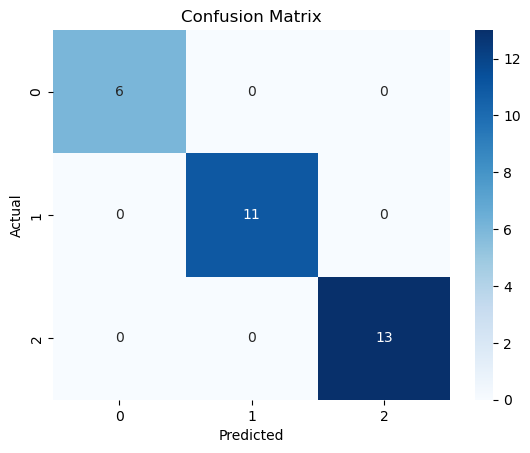

In [51]:
y_pred = model3.predict(x_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest Classifier :", accuracy)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### ML Model - 4 : SVM (Support Vector Machine)

In [54]:
# ML Model - 4 Implementation
model4 = SVC(kernel='linear', random_state=0, probability=True)
model4.fit(x_train, y_train)
# Model is trained (fit) and predicted in the evaluate model

SVC(kernel='linear', probability=True, random_state=0)

Accuracy of support vector machine : 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



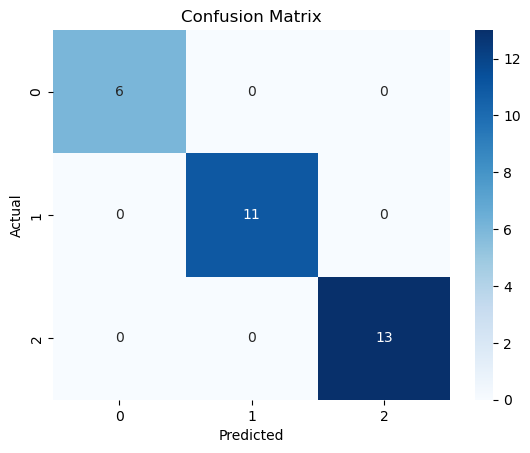

In [55]:
y_pred = model4.predict(x_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of support vector machine :", accuracy)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### ML Model - 5 : Xtreme Gradient Boosting

In [57]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Train the XGBoost classifier
model5 = xgb.XGBClassifier()
model5.fit(x_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Accuracy of XGB Classifier: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



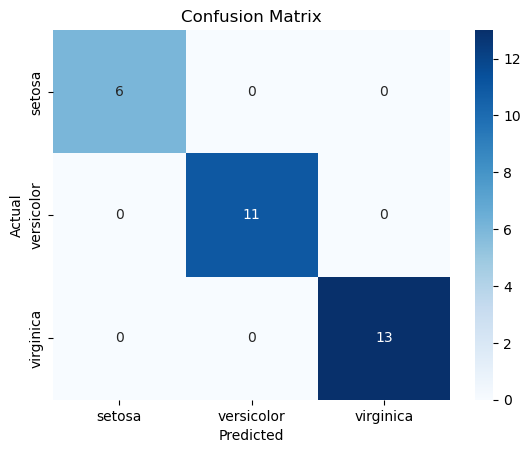

In [58]:
# Model already trained on encoded y
y_pred = model5.predict(x_test)

# Accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy of XGB Classifier:", accuracy)

# Classification Report
print("Classification Report:\n", classification_report(y_test_encoded, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### ML Model - 6 : Naive Bayes

In [61]:
# ML Model - 6 Implementation
model6 = GaussianNB()
model6.fit(x_train , y_train)

GaussianNB()

Accuracy of Naive Bays : 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



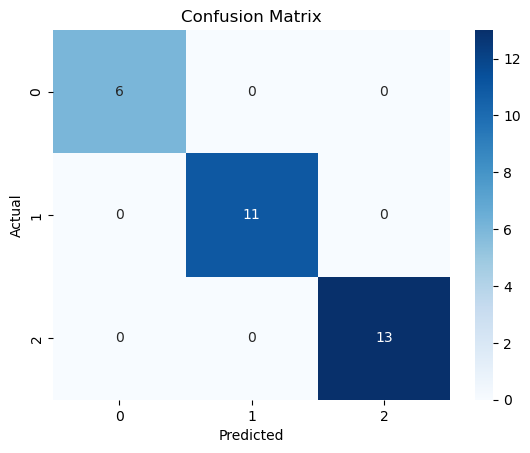

In [62]:
y_pred = model6.predict(x_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Naive Bays :", accuracy)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## ***Selection of best model***

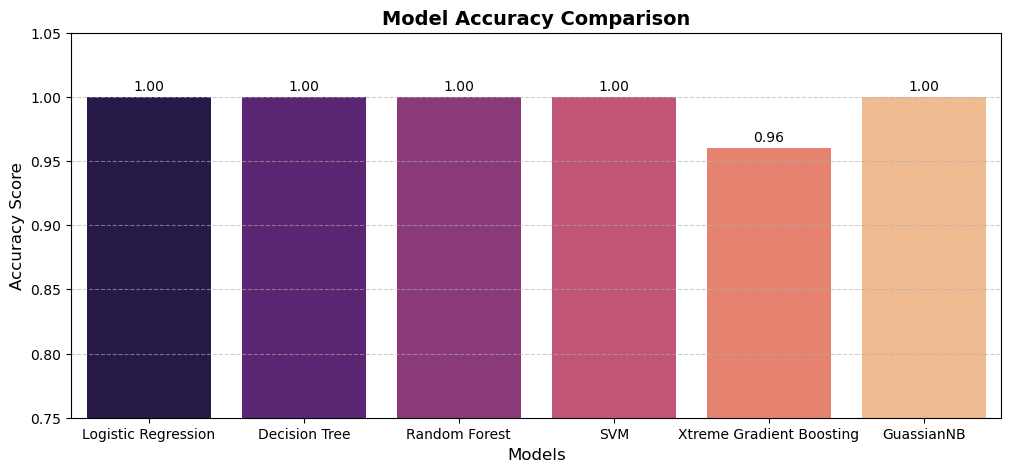

In [99]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Xtreme Gradient Boosting','GuassianNB']
accuracy_scores = [1.0, 1.0, 1.0, 1.0 ,0.96, 1.0]
plt.figure(figsize=(12, 5))
sns.barplot(x=model_names, y=accuracy_scores, palette="magma")
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy Score", fontsize=12)
plt.title("Model Accuracy Comparison", fontsize=14, fontweight="bold")
for i, acc in enumerate(accuracy_scores):
    plt.text(i, acc + 0.005, f"{acc:.2f}", ha="center", fontsize=10)
plt.ylim(0.75, 1.05)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

In [101]:
from sklearn.metrics import accuracy_score

# Dictionary of models
models = {
    "Logistic Regression": model1,
    "Decision Tree": model2,
    "Random Forest": model3,
    "SVM": model4,
    "XGBoost": model5,
    "Naive bayes GuassianNB": model6
}

# Iterate through models
for name, model in models.items():
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    print(f"Model: {name}")
    print(f"  Training Accuracy: {train_acc:.4f}")
    print(f"  Testing Accuracy : {test_acc:.4f}\n")


Model: Logistic Regression
  Training Accuracy: 1.0000
  Testing Accuracy : 1.0000

Model: Decision Tree
  Training Accuracy: 1.0000
  Testing Accuracy : 1.0000

Model: Random Forest
  Training Accuracy: 1.0000
  Testing Accuracy : 1.0000

Model: SVM
  Training Accuracy: 1.0000
  Testing Accuracy : 1.0000

Model: XGBoost
  Training Accuracy: 0.0000
  Testing Accuracy : 0.0000

Model: Naive bayes GuassianNB
  Training Accuracy: 1.0000
  Testing Accuracy : 1.0000



# **Conclusion**

In the Iris flower classification project, the Random Forest model has been selected as the final prediction model. The project aimed to classify Iris flowers into three distinct species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica. After extensive data exploration, preprocessing, and model evaluation, the following conclusions can be drawn:

1. **Data Exploration:** Through a thorough examination of the dataset, we gained insights into the characteristics and distributions of features. We found that Iris-Setosa exhibited distinct features compared to the other two species.

2. **Data Preprocessing:** Data preprocessing steps, including handling missing values and encoding categorical variables, were performed to prepare the dataset for modeling.

3. **Model Selection:** After experimenting with various machine learning models, tuned Random Forest was chosen as the final model due to its simplicity, interpretability, and good performance in classifying Iris species.

4. **Model Training and Evaluation:** The Random Forest (tuned) model was trained on the training dataset and evaluated using appropriate metrics. The model demonstrated satisfactory accuracy and precision in classifying Iris species.

5. **Challenges and Future Work:** The project encountered challenges related to feature engineering and model fine-tuning. Future work may involve exploring more advanced modeling techniques to improve classification accuracy further.

6. **Practical Application:** The Iris flower classification model can be applied in real-world scenarios, such as botany and horticulture, to automate the identification of Iris species based on physical characteristics.

In conclusion, the Iris flower classification project successfully employed Random Forest (tuned) as the final prediction model to classify Iris species. The project's outcomes have practical implications in the field of botany and offer valuable insights into feature importance for species differentiation. Further refinements and enhancements may lead to even more accurate and reliable classification models in the future.